In [29]:
#!/usr/bin/python
%matplotlib inline 

import sys
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append("../tools/")

# Data Exploration

In [30]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

first_data_item = [v for v in data_dict.values()[:1]]
print '-----------------------------------------'
print 'Data Example: ', (json.dumps(first_data_item, indent=2))

data_points = len(data_dict)
print '-----------------------------------------'
print 'Total number of data points:', data_points
 
# add all features first to list and check the NaNs 
# 'poi' has to be first, because it is the target
features_list = ['poi',
                 'salary', "to_messages", 
                 "total_payments",      
    "exercised_stock_options", 
    "bonus", 
    "restricted_stock", 
    "shared_receipt_with_poi", 
    "restricted_stock_deferred", 
    "total_stock_value", 
    "expenses", 
    "loan_advances", 
    "from_messages", 
    "from_this_person_to_poi", 
    "director_fees", 
    "deferred_income", 
    "long_term_incentive", 
    "from_poi_to_this_person"] 


-----------------------------------------
Data Example:  [
  {
    "salary": 365788, 
    "to_messages": 807, 
    "deferral_payments": "NaN", 
    "total_payments": 1061827, 
    "exercised_stock_options": "NaN", 
    "bonus": 600000, 
    "restricted_stock": 585062, 
    "shared_receipt_with_poi": 702, 
    "restricted_stock_deferred": "NaN", 
    "total_stock_value": 585062, 
    "expenses": 94299, 
    "loan_advances": "NaN", 
    "from_messages": 29, 
    "other": 1740, 
    "from_this_person_to_poi": 1, 
    "poi": false, 
    "director_fees": "NaN", 
    "deferred_income": "NaN", 
    "long_term_incentive": "NaN", 
    "email_address": "mark.metts@enron.com", 
    "from_poi_to_this_person": 38
  }
]
-----------------------------------------
Total number of data points: 146


In [31]:
# load data into a dataframe 
df = pd.DataFrame.from_dict(data_dict, orient = 'index')
# replace the NaN for our exploration - undo it for the machine learning part
df = df.replace('NaN', np.nan)
df = df[features_list]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 18 columns):
poi                          146 non-null bool
salary                       95 non-null float64
to_messages                  86 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
from_this_person_to_poi      86 non-null float64
director_fees                17 non-null float64
deferred_income              49 non-null float64
long_term_incentive          66 non-null float64
from_poi_to_this_person      86 non-null float

'restricted_stock_deferred', 'loan_advances' and 'director_fees' have at least 88.7% of NaN values. But this does not mean, that the features are no good. Maybe they will do a good work in combination with other features. So (for now) we are going to keep all features.

In [32]:
print "Amount of NaN values in the dataset: ", df.isnull().sum().sum()
# Todo compare total and nan

Amount of NaN values in the dataset:  1163


In [33]:
poi_to_non_poi = df.poi.value_counts()
poi_to_non_poi.index=['non persons of interest', 'persons of interest']

poi_to_non_poi

non persons of interest    128
persons of interest         18
Name: poi, dtype: int64

### Features

In [34]:
#count NaNs for each row in dataframe
df[df.isnull().sum(axis=1) >= 16]

,poi,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
LOCKHART EUGENE E,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
THE TRAVEL AGENCY IN THE PARK,False,NaN,NaN,362096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WODRASKA JOHN,False,NaN,NaN,189583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are four entries that have 13 or more NaN s out of 18. We remove "LOCKHART EUGENE E" because this entry only contains NaNs and we will also remove "THE TRAVEL AGENCY IN THE PARK", because it contains only on entry and is not a person.

In [35]:
df = df.drop('TOTAL')
df = df.drop('LOCKHART EUGENE E')
df = df.drop('THE TRAVEL AGENCY IN THE PARK')

data_dict.pop('TOTAL', 0)
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

### Identifying outliers

              Bonus       Salaray
count  8.100000e+01  9.400000e+01
mean   1.201773e+06  2.840875e+05
std    1.441679e+06  1.771311e+05
min    7.000000e+04  4.770000e+02
25%             NaN           NaN
50%             NaN           NaN
75%             NaN           NaN
max    8.000000e+06  1.111258e+06
                       salary      bonus
SKILLING JEFFREY K  1111258.0  5600000.0
LAY KENNETH L       1072321.0  7000000.0
FREVERT MARK A      1060932.0  2000000.0
PICKERING MARK R     655037.0   300000.0
WHALLEY LAWRENCE G   510364.0  3000000.0
                       salary      bonus
LAVORATO JOHN J      339288.0  8000000.0
LAY KENNETH L       1072321.0  7000000.0
SKILLING JEFFREY K  1111258.0  5600000.0
BELDEN TIMOTHY N     213999.0  5249999.0
ALLEN PHILLIP K      201955.0  4175000.0
KITCHEN LOUISE       271442.0  3100000.0
DELAINEY DAVID W     365163.0  3000000.0
WHALLEY LAWRENCE G   510364.0  3000000.0
MCMAHON JEFFREY      370448.0  2600000.0
FALLON JAMES B       304588.0  2500000

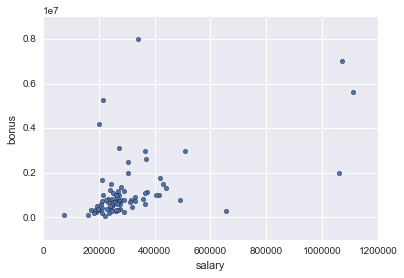

In [36]:
#data_dict.pop("TOTAL", 0) 
#df = df.drop('TOTAL')
money_df = pd.DataFrame({"Salaray": df['salary'],
                          "Bonus": df['bonus']})
print money_df.describe()

new = df.filter(['salary','bonus'], axis=1)

print new.nlargest(5, 'salary')
print new.nlargest(10, 'bonus')

df.plot.scatter('salary', 'bonus')

There is a data point far far away from the others. As the name of this datapoint is "Total " it is clear that this is an outlier due to a spreadsheet error. We will remove this datapoint and take a closer look.

After removing the spreadsheet error, we can identify some outliers in the salary. SKILLING JEFFREY K, LAY KENNETH L and FREVERT MARK A had a salary over 1.000.000 each. The highest Bonus had LAVORATO JOHN J. with a bonus of 8.000.000. There are some more outliers, but we want to keep this data for our analysis, because those are more likely to be anomalies than outliers.

# Optimize Feature Selection

### Create new features

We want to create new features showing the fraction of the POI messages sent, because we think that the messaging between POIs relatively higher than between non POIs. We also suggest that the bonus for POIs is relatively higher than for non POIs.

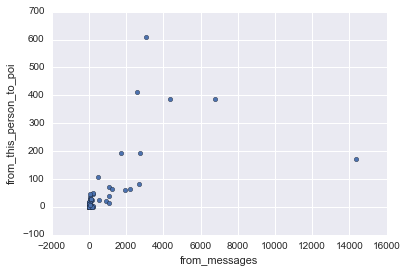

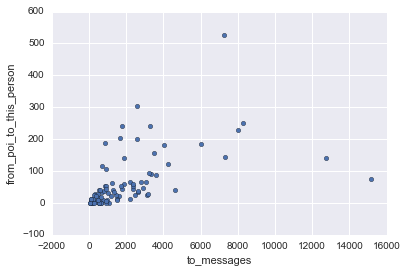

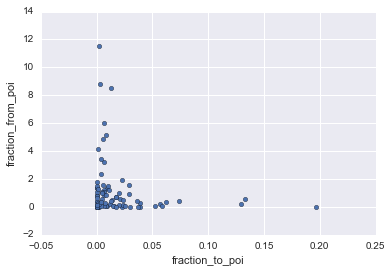

In [37]:
# dataframe
df['fraction_to_poi'] = df['from_this_person_to_poi'] / df['to_messages']
df['fraction_from_poi'] = df['from_poi_to_this_person'] / df['from_messages']

df.plot.scatter('from_messages', 'from_this_person_to_poi')
df.plot.scatter('to_messages', 'from_poi_to_this_person')

#plot new features
df.plot.scatter('fraction_to_poi', 'fraction_from_poi')  

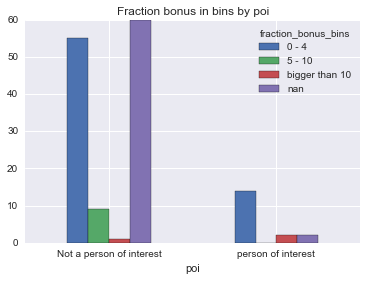

In [38]:
# bonus to total_payments
df['fraction_bonus'] = df['total_payments'] / df['bonus']

# add a new column with bins for fraction bonus
def get_fraction_bonus_bins(fraction_bonus):
    fraction_bonus_bins = fraction_bonus
    if fraction_bonus > 4 and fraction_bonus <= 10:
        return '5 - 10'
    elif fraction_bonus > 0 and fraction_bonus < 5:
        return '0 - 4'
    elif fraction_bonus > 10:
        return 'bigger than 10'
    else:
        return 'nan'

df['fraction_bonus_bins'] = df['fraction_bonus'].apply(get_fraction_bonus_bins)

df.groupby('poi')['fraction_bonus_bins'].value_counts().unstack().plot(kind = 'bar')
plt.xticks([0, 1], ['Not a person of interest', 'person of interest'], rotation = 0)
plt.title('Fraction bonus in bins by poi')

In [39]:
#Test old features list - without feature selection

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

my_dataset = data_dict  

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

In [40]:
# once again  - create new features and add them to the data dict:
for k in data_dict.keys():
    data_dict[k]['ratio_from_poi'] = 0
    if (data_dict[k]['from_poi_to_this_person'] != 'NaN') and (data_dict[k]['from_messages'] != 'NaN') and (data_dict[k]['from_messages'] != 0):
        data_dict[k]['ratio_from_poi'] = float(data_dict[k]['from_poi_to_this_person'])/float(data_dict[k]['from_messages'])
features_list.append('ratio_from_poi')

for k in data_dict.keys():
    data_dict[k]['ratio_to_poi'] = 0
    if (data_dict[k]['from_this_person_to_poi'] != 'NaN') and (data_dict[k]['to_messages'] != 'NaN') and (data_dict[k]['to_messages'] != 0):
        data_dict[k]['ratio_to_poi'] = float(data_dict[k]['from_this_person_to_poi'])/float(data_dict[k]['to_messages'])
features_list.append('ratio_to_poi')

for k in data_dict.keys():
    data_dict[k]['ratio_bonus'] = 0
    if (data_dict[k]['total_payments'] != 'NaN') and (data_dict[k]['bonus'] != 'NaN') and (data_dict[k]['bonus'] != 0):
        data_dict[k]['ratio_bonus'] = float(data_dict[k]['total_payments'])/float(data_dict[k]['bonus'])
features_list.append('ratio_bonus')

In [41]:
import numpy
from sklearn import tree

# show scores of features list without new features
clf = tree.DecisionTreeClassifier()
test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80560	Precision: 0.26195	Recall: 0.25200	F1: 0.25688	F2: 0.25393
	Total predictions: 15000	True positives:  504	False positives: 1420	False negatives: 1496	True negatives: 11580



In [42]:
my_dataset = data_dict  
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

In [43]:
# show scores of features list with new features
clf = tree.DecisionTreeClassifier()
test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80500	Precision: 0.26024	Recall: 0.25100	F1: 0.25554	F2: 0.25279
	Total predictions: 15000	True positives:  502	False positives: 1427	False negatives: 1498	True negatives: 11573



With the new features we are able to improve the accuracy from 0.79015 to 0.79146.

## Select Features

By selecting (the best) features we want to 
- reduce overfitting
- improve accuracy
- reduce training time

Because we don't know how many features to use, we want to take a look at the scores depending on the number of features in the first step.

In [44]:
print len(features_list)

21


In [45]:
from sklearn.feature_selection import SelectKBest
# Univariate feature selection
# Get best features

k_best = SelectKBest(k='all')
k_best.fit(features, labels)
scores = k_best.scores_
unsorted_pairs = zip(features_list[1:], scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))

In [46]:
sorted_pairs_kb_df = pd.DataFrame.from_dict(sorted_pairs)
sorted_list = sorted_pairs_kb_df[0].tolist()
sorted_list.insert(0, 'poi')

## SELECT KBEST

TODO TEXt

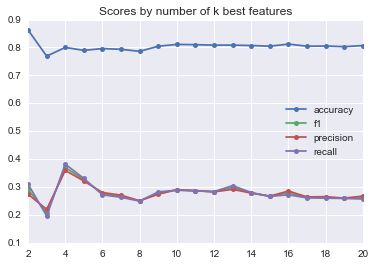

In [47]:
from amount_of_features import test_classifier_by_feature_length, calc_for_features_list_length

# check out number the best number of features by k best selection
clf = tree.DecisionTreeClassifier()
no_features_tree = calc_for_features_list_length(clf, my_dataset, sorted_list)

no_features_tree_df = pd.DataFrame.from_dict(no_features_tree)
no_features_tree_df = no_features_tree_df.T

no_features_tree_df.plot.line(marker='.', 
                              markersize=10,
                              title='Scores by number of k best features'
                             )

As we can see in the plot in the plot above, the best scores can be achieved when we use the 4 best features of select k best. Next we want to look if PCA and check if this is able to achieve better scores.

## Principle Component Analysis
For selecting Features PCA is better, because it takes the features and creates new ones superior to original attributes.

Principal Component of a dataset is the direction that has the largest variance*, because it retains the max amoutn of information of the original data. 

Systematized way to transform input features into principle components
Use principal components as new features
PCs are directions in data that maximize variance (minimize information loss) whe you project/compress down onto them. More variance of data along a PC, higher that PC is ranked
Most variance/most information -> first PC
Second most variance (without overlapping w/ first PC) -> second PC
Max no. of Pcs = no. of input features

We want to use PCA when latent features driving the patterns in data
We need dimensionality reduction for visualizing high-dimensional data, reduce noise and
make other algorithms (regression, classification) work better we fewer inputs 

*Variance: "spread of data distribution" -> similar to standard deviation

In [48]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def doPCA(number):
    pca = PCA(n_components=number)
    pca.fit(data)
    return pca
    
def calc_for_features_list_length_pca(my_dataset, features_list):
    count = len(features_list)
    features_scores_pca = {}
    while count > 2:
        count = count - 1
        dt = tree.DecisionTreeClassifier()
       
        pca = doPCA(count)
        
        clf = Pipeline(steps=[('pca', pca), ('dt', dt)])
                
        accuracy, f_score, precision, recall = test_classifier_by_feature_length(
            clf, my_dataset, features_list)
        features_scores_pca[count] = {'accuracy': accuracy, 'f1': f_score, 'precision': precision, 'recall': recall}

    return features_scores_pca

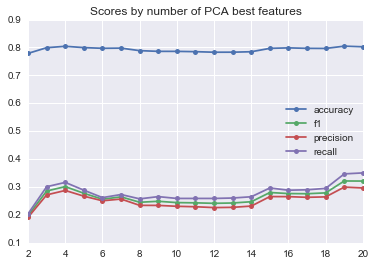

In [49]:
no_features_tree_pca = calc_for_features_list_length_pca(my_dataset, features_list)
no_features_tree_pca_df = pd.DataFrame.from_dict(no_features_tree_pca)
no_features_tree_pca_df = no_features_tree_pca_df.T
no_features_tree_pca_df.plot.line(marker='.', 
                              markersize=10,
                              title='Scores by number of PCA best features'
                            )

As the plot above shows the best scores can be achieved with using the best 19 features. But the best scores of PCA are worse than those of SelectK Best. Regarding the calculating time of the program and the scores, we suggest that is is better to use SelectK Best, because only 4 features are needed to get scores around 0.4.

In [50]:
k_best = SelectKBest(k=4)
k_best.fit(features, labels)
scores = k_best.scores_
unsorted_pairs = zip(features_list[1:], scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))

sorted_pairs_kb_df = pd.DataFrame.from_dict(sorted_pairs)
best_features_list = sorted_pairs_kb_df[0].tolist()
best_features_list.insert(0, 'poi')
best_features_list = best_features_list[:5]
print best_features_list

['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary']


# Pick and Tune an Algorithm

*Naive Baies.*
Does Feature scaling by design, so we don't need to scale our features before.

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
test_classifier(clf, my_dataset, best_features_list)

GaussianNB(priors=None)
	Accuracy: 0.84677	Precision: 0.50312	Recall: 0.32300	F1: 0.39342	F2: 0.34791
	Total predictions: 13000	True positives:  646	False positives:  638	False negatives: 1354	True negatives: 10362



*SVM.*
Needs Feature Scaling, because SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important. 

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = SVC(kernel="linear")
clf = Pipeline(steps=[('scale', StandardScaler()), ('svc', svc)])
test_classifier(clf, my_dataset, best_features_list)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.84808	Precision: 0.53351	Recall: 0.09950	F1: 0.16772	F2: 0.11883
	Total predictions: 13000	True positives:  199	False positives:  174	False negatives: 1801	True negatives: 10826



*Knn.*
Because this algorithm measure the distances between pairs of samples, we have to scale the features.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

clf = Pipeline(steps=[('scale', StandardScaler()), ('knn', knn)])
test_classifier(clf, my_dataset, best_features_list)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])
	Accuracy: 0.84185	Precision: 0.37273	Recall: 0.04100	F1: 0.07387	F2: 0.04988
	Total predictions: 13000	True positives:   82	False positives:  138	False negatives: 1918	True negatives: 10862



*DecisionTree.* Does not require feature scaling.

In [54]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
test_classifier(clf, my_dataset, best_features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.78646	Precision: 0.31165	Recall: 0.32100	F1: 0.31626	F2: 0.31909
	Total predictions: 13000	True positives:  642	False positives: 1418	False negatives: 1358	True negatives: 9582



*Random Forest*. Does not require feature scaling.

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
test_classifier(rf, my_dataset, best_features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84346	Precision: 0.48128	Recall: 0.22500	F1: 0.30664	F2: 0.25182
	Total predictions: 13000	True positives:  450	False positives:  485	False negatives: 1550	True negatives: 10515



## Tune the algorithm 


Algorithms have a lot of parameters. In order to find the best combination, we want to tune our algorithm.
GridSearchCV or Random Search are approaches to achieve this parameter optimization. 

GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.


We received the best result with the GaussianNB. 
As there are not a lot of parameters to tune there, we want to tune the second best algorithm - DecisionTree -  with the help of GridSearch.
The default parameters are:
                    class_weight=None, criterion='gini, max_depth=None,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_split=1e-07, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    presort=False, random_state=None, splitter='best'

We now want to tune the min_samples_split with 2, 3 splits, the min_samples_leaf with 1, 2 or 3 leaves. The Criterion measures the quality of a split, supported criterias are “gini” for the Gini impurity and “entropy” for the information gain. 

In [59]:
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

pipe = Pipeline([('dt', dt)])
parameters = dict(dt__criterion=['gini', 'entropy'],
                  dt__min_samples_leaf=[1, 2, 3],
                  dt__min_samples_split=[2, 3, 4])
                        
clf = GridSearchCV(pipe, parameters)
clf = clf.fit(features, labels)

test_classifier(clf, my_dataset, best_features_list)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'dt__min_samples_split': [2, 3, 4], 'dt__min_samples_leaf': [1, 2, 3], 'dt__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.80262	Precision: 0.32848	Recall: 0.27100	F1: 0.29699	F2: 0.28083
	Total predictions: 13000	True positives:  542	False positives: 1108	False negatives: 1458	True negatives: 9892



Thanks to GridSearchCV we were able to boost the accuracy and the precision but the recall is worse now. This may be caused by overfitting. So we stay with the default parameters as we achieved the best result. 

In [ ]:
clf = GaussianNB()
dump_classifier_and_data(clf, my_dataset, best_features_list)

## Evaluation Metrics

### Accuracy.

\begin{equation} 
% 
accuracy =\frac{\text{number of all data points labeled correctly}}{\text{all items in this data}}
%
\end{equation}

With GridSearch and RandomForestClassifier we are able to boost the accuracy to 0.84415. That means we are 0.34415 better than random guessing if a person is a POI or not. 

### Recall.

\begin{equation} 
% 
recall =\frac{\text{true positives}}{\text{true positives} + \text{false negatives}}
%
\end{equation}

good recall:
Whenever the target (in our case POI) shows up in the data set, we can identify it almost every time. he cost of this is that we sometimes get some false positives.

### Precision.

\begin{equation} 
% 
precision =\frac{\text{true positives}}{\text{true positives} + \text{false positives}}
%
\end{equation}

good precision: 
Whenever the target (in our case POI) gets flagged in the data set, it is very likely to be a real target and not a false alarm. 

###  F1 score.
This score is a measure of a test's accuracy. It considers recall and precision.
good f1 score:
This is the best of both worlds. Both my false positive and false negative rates are low.

## Validate

Validation is process of determining how well your model performs. We are using k-fold cross validation for this project. This means the data ist split into test (best validation, when maximum amount) and training (best learning results, when maximum amount). In order to handle the trade off between the split data, we run k separate learning experiment, so at the end all data has been used for training and testing.

In our case the  sklearn StratifiedShuffleSplit with labels, folds=1000 and random_state = 42 as parameters is used as a cross-validator in the tester.py

In [ ]:
from sklearn import cross_validation

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(
    features, labels, test_size=0.4, random_state=0)

clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)

### References

http://scikit-learn.org

http://maciejjaskowski.github.io/2016/01/22/pandas-scikit-workflow.html

http://machinelearningmastery.com/feature-selection-machine-learning-python/

https://en.wikipedia.org/wiki/F1_score

https://7264-843222-gh.circle-artifacts.com/0/home/ubuntu/scikit-learn/doc/_build/html/stable/auto_examples/preprocessing/plot_scaling_importance.html

https://discussions.udacity.com/t/errors-when-using-selectkbest-in-final-project/170706/6

http://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
